In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import random
import operator
pd.options.display.max_rows = None

In [5]:
#definimos la clase board
class board():
    def __init__(self,n=10):
        self.n=n#dimensiones de la cuadricula nxn
        self.current_state=(1,3,0)#posicion inicial del agente; las primeras 2 coordenadas representan las coordenadas 
        #de la grilla
        # y el tercer elemento de la tupla representa el estado del pasajero, 0, si esta sin pasajero, 1 si esta con pasajero
        self.grid=np.zeros((5,5)) #almacenamos el gridworld como una matriz 5x5con las recompensas de las casillas en cero
       
        self.__values=[np.zeros((5,5)),np.zeros((5,5))]#creamos una matriz con las mismas dimensiones que el grid world, y 
        #la almacenamos 2 veces, 1 por cada posible estado del pasajero
        self.__values[0][4,3]=1#recoger al pasajero en la posicion B
        self.__values[1][0,0]=5#Dejar al pasajero en la posicion R
        
        self.punto_recogida=(4,0)
        self.punto_entrega=(0,4)
                
        
        
        #Creamos unos atributos adicionales para saber donde estan los obstaculos de la grid
        self.no_derecha=[(3,0),(4,0),(0,1),(1,1),(3,2),(4,2)]#lista de las casillas desde los que no se puede mover a la derecha
        self.no_izquierda=[(3,1),(4,1),(0,2),(1,2),(3,3),(4,3)]#lista de las casillas desde los que no se puede ir a la izquierda
        
    def get_current_state(self):
        return self.current_state
    def get_posible_actions(self, estado_actual):
        fila, columna, pasajero=estado_actual #desempacamos la fila y la columna
        n_filas,n_columnas=self.grid.shape
        #del estado actual
        acciones=[]
        n=self.n
     
        #verificar si up es posible:
        if (fila!=0) and (np.isnan(self.grid[fila-1,columna])==False):#se puede mover hacia arriba
            #si no esta en la fila cero y ademas en la casilla superior no hay obstaculo
            acciones.append("up")
        #verificar si down es posible
        if (fila!=n_filas-1) and (np.isnan(self.grid[fila+1,columna])==False):#se puede mover hacia abajo
            #si no esta en la ultima fila y ademas la casilla de abajo no es obstaculo
            acciones.append("down")
        #verificar si right es posible
        if (columna!=n_columnas-1) and (np.isnan(self.grid[fila,columna+1])==False) and ((fila,columna) not in self.no_derecha):#se puede mover hacia la
            #derecha si no esta en la ultima columna y ademas la casilla de la derecha no es obstaculo
            acciones.append("right")
        if (columna!=0) and (np.isnan(self.grid[fila,columna-1])==False) and ((fila,columna) not in self.no_izquierda):#se puede mover hacia la izquierda
            #si no esta en la primera coulumna y ademas la casilla de la izquiera no es un obstaculo
            acciones.append("left")
        #adicionamos las acciones de jear y recoger
        acciones.append("dejar")
        acciones.append("recoger")
        return acciones
    
    def do_action(self, action):
        fila_actual, columna_actual,pasajero=self.current_state
        acciones_posibles=self.get_posible_actions((fila_actual,columna_actual,pasajero))
        if action not in acciones_posibles:
            return (0,self.current_state)
        if action=="recoger":
            if pasajero==1:#va a recoger, pero lleva pasajero a bordo
                return(-10,self.current_state)#devuelve recompensa negativa de -10 y queda en el mismo estado
            elif pasajero==0:#no lleva pasajero
                if (fila_actual==self.punto_recogida[0]) and (columna_actual==self.punto_recogida[1]):#esta en la posicion 
                    #correcta
                    self.current_state=(self.punto_recogida[0],self.punto_recogida[1],1)#se actualiza el estado actual
                    return(1,self.current_state)
                else:#no lleva pasajero, pero intenta recogerlo en posicion equivocada
                    return(-10,self.current_state)#devuelve recompensa de -10 y queda en el mismo estado
        if action=="dejar":
            #print("ingreso")
            if pasajero==0: #va a dejar un pasajero, pero no lleva ninguno
                return(-10,self.current_state)#devuelve recompensa de -10 y queda en el mismo estado
            elif pasajero==1: #va a dejar pasajero y si lleva pasajero a bordo.
                if (fila_actual==self.punto_entrega[0]) and (columna_actual==self.punto_entrega[1]):#esta en la posicion 
                    #correcta
                    return(5,"END")#devuelve recompensa de 5 y sale del episodio
                else:#lleva pasajero, pero intenta dejarlo en posicion equivocada
                    return(-10,self.current_state)#devuelve recompensa de -10 y queda en el mismo estado
                
                
                    
                
            
              
        if action=="up":#moverse hacia arriba, restar 1 al valor de la fila actual
            self.current_state=(fila_actual-1,columna_actual,pasajero)
        elif action=="down":#moverse hacia arriba, sumar 1 al valor de la fila actual
            self.current_state=(fila_actual+1,columna_actual,pasajero)
        elif action=="right":#moverse hacia derecha, sumar 1 al valor de la columna actual
            self.current_state=(fila_actual,columna_actual+1,pasajero)
        else:
            #moverse hacia izquierda, restar 1 al valor de la columna actual
            self.current_state=(fila_actual,columna_actual-1,pasajero)
        return (self.grid[self.current_state[0],self.current_state[1]],self.current_state)   
    def reset(self):#reiniciar
        self.current_state=(0,0,0)
        self.reward=0
    def is_terminal(self,estado):
        fila,columna,pasajero=estado
        if (fila==0) and (columna==0) and (pasajero==1):#Si esta en la casilla R y lleva pasajero, devuelve verdadero, 
            #d.l.c falso
            return True
        else:
            return False
        
    #HASTA AQUI EL PUNTO I) DE LA TAREA, QUE CORRESPONDIA A LA DEFINICION DEL AMBIENTE.
    #PARA LA PARTE II) DE LA TAREA, QUE ES CONSTRUIR EL MARKOV DECISSION PROCESS, DEFINIMOS OTRO
    #METODO, QUE LLAMÉ MDP
    def grilla(self):
        colormap = colors.ListedColormap(["red","green","blue"])
        plt.figure(figsize=(5,5))
        plt.imshow(self.grid,cmap=colormap)
        plt.title("Grilla para juego: en verde las casillas sin recompensa, en blanco, los obstaculos, en azul la casilla objetivo, y en rojo las casillas trampa")
        plt.show()
                
    


        
            

In [6]:
class Q_LEARNING():
    def __init__(self,env,epsilon,gamma,alpha):
        self.epsilon=epsilon
        self.gamma=gamma
        self.alpha=alpha
        self.env=env
        #creamos el atributo Q para guardar los valores de las acciones y los estados
        #Inicalizalizamos un diccionario para almacenar los q_valores de las acciones y estados:
        self.Q={}
        filas,columnas=self.env.grid.shape
        acciones=["up","right","left","down","recoger","dejar"]#las posibles acciones se extienden con recoger y dejar
        estado_pasajero=[0,1]#el pasajero tiene 2 posibles estados, 0 si esta no esta abordo, 1 si sí
        for i in range(filas):
            for j in range(columnas):
                for k in estado_pasajero:
                    self.Q[(i,j,k)]={accion:0 for accion in acciones}#por cada estado, creamos un diccionario con las claves
                    #que corresponden a cada uno de los posibles estados, y los valores de dichas claves se inicializan en cero

        #inicializamos una lista con todos los posibles estados:
        self.posibles_estados=[]
        for i in range(filas):
            for j in range(columnas):
                if np.isnan(self.env.grid[i,j])==False:
                    self.posibles_estados.append((i,j,0))#Todos los posibles estados desde donde puede iniciar el taxi
        
        
        
    def choose_action(self,estado):
        #seleccionamos la accion maxima
        accion= max(self.Q[estado], key=self.Q[estado].get)
        #seleccionamos la lista de todas las posibles acciones:
        posibles_acciones=list(self.Q[estado].keys())
        #creamos una lista con las posibles acciones diferentes a la greedy:
        posibles_acciones_diferentes=[]
        for element in posibles_acciones:
            if element!=accion:
                posibles_acciones_diferentes.append(element)
        #ahora escogemos entre seguir la greedy o no:
        
        decision=np.random.choice([0,1],p=[1-self.epsilon,self.epsilon])#0 si sigue la politica greedy, 1 si no
        if decision==0:
            return accion#si salio seguir la greedy, devuelve la accion greedy
        else:
            try:
                return random.choice(posibles_acciones_diferentes)#si salio la opcion de explorar, devuelve una accion 
            except IndexError:
                return accion
                #aleatoria diferente a la greedy
    def Q_max(self,estado):#devuelve el valor del maximo estado al que se puede llegar desde el estado dado:
        accion= max(self.Q[estado], key=self.Q[estado].get)
        return self.Q[estado][accion]
        
                
    def action_function(self,estado1, accion1, recompensa, estado2):
        #implementa el calculo del q_valor de la accion segun el agoritmo de Q_learning
        
        if estado2=="END":
            self.Q[estado1][accion1]=self.Q[estado1][accion1]+self.alpha*(recompensa-
                                                                     self.Q[estado1][accion1])
        else:
            Q_max=self.Q_max(estado2)
            self.Q[estado1][accion1]=self.Q[estado1][accion1]+self.alpha*(recompensa+self.gamma*Q_max-self.Q[estado1][accion1])
    def episodio(self):
        #inicializar un estado S:
        S_1=random.choice(self.posibles_estados)
        
        terminado=False#creamos una variable para saber si el episodio esta terminado
        while terminado==False:
            #print(S_1)
            if S_1=="END":
                #print(S_1)
                terminado=True
            else:
                           
                #print(S_1)
                accion1=self.choose_action(S_1)#calculamos la accion a tomar para estado S1
                #print(accion1)
                self.env.current_state=S_1
                recompensa,S_2=self.env.do_action(accion1)#ejecutamos la accion 1 desde el estado 1, y obtenemos la recompensa
                #print(recompensa)
                #y quedamos en el estado 2
                
                #finalmente, ejecutamos la funcion action_function:
                self.action_function(S_1,accion1,recompensa,S_2)
                #ahora cambiamos S1 a S2 para el siguiente step

                S_1=S_2
                #verficamos si es terminal
                if accion1=="Salir":
                    terminado=True
    def politica_optima(self,episodios):
        #ejecuta los episodios:
        for i in range(episodios):
            self.episodio()#ejecuta la funcion episodio
            print(f"episodio {i}")
        #ahora calculamos la politica optima
        filas,columnas=self.env.grid.shape#obtenemos el numero de filas y columnas
        for k in [0,1]:#itera sobre los dos posibles estados del pasajero para generar dos tablas
            
            decisiones=[]
            self.epsilon=0#ahora solo seguimos politicas greedy
            for i in range(filas):
                lista_fila=[self.choose_action((i,j,k)) for j in range(columnas) ]
                decisiones.append(lista_fila)
            print(pd.DataFrame(decisiones))
   
        
        
        
        
            
        

In [7]:
my_board=board()


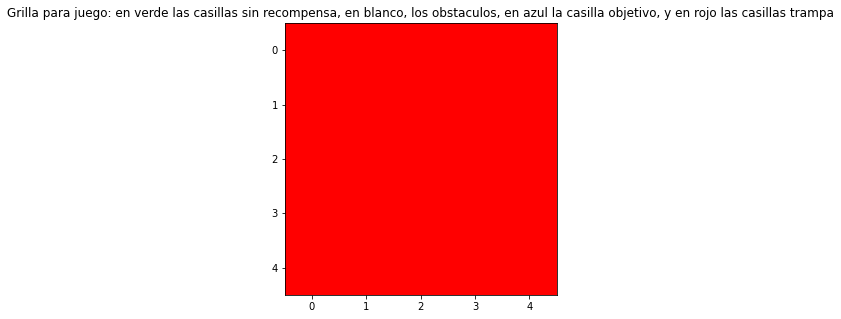

In [8]:
my_board.grilla()

In [9]:
my_q_learning=Q_LEARNING(my_board,0.5,1,0.0001)

In [10]:
my_q_learning.politica_optima(1000)

episodio 0
episodio 1
episodio 2
episodio 3
episodio 4
episodio 5
episodio 6
episodio 7
episodio 8
episodio 9
episodio 10
episodio 11
episodio 12
episodio 13
episodio 14
episodio 15
episodio 16
episodio 17
episodio 18
episodio 19
episodio 20
episodio 21
episodio 22
episodio 23
episodio 24
episodio 25
episodio 26
episodio 27
episodio 28
episodio 29
episodio 30
episodio 31
episodio 32
episodio 33
episodio 34
episodio 35
episodio 36
episodio 37
episodio 38
episodio 39
episodio 40
episodio 41
episodio 42
episodio 43
episodio 44
episodio 45
episodio 46
episodio 47
episodio 48
episodio 49
episodio 50
episodio 51
episodio 52
episodio 53
episodio 54
episodio 55
episodio 56
episodio 57
episodio 58
episodio 59
episodio 60
episodio 61
episodio 62
episodio 63
episodio 64
episodio 65
episodio 66
episodio 67
episodio 68
episodio 69
episodio 70
episodio 71
episodio 72
episodio 73
episodio 74
episodio 75
episodio 76
episodio 77
episodio 78
episodio 79
episodio 80
episodio 81
episodio 82
episodio 83
ep

episodio 645
episodio 646
episodio 647
episodio 648
episodio 649
episodio 650
episodio 651
episodio 652
episodio 653
episodio 654
episodio 655
episodio 656
episodio 657
episodio 658
episodio 659
episodio 660
episodio 661
episodio 662
episodio 663
episodio 664
episodio 665
episodio 666
episodio 667
episodio 668
episodio 669
episodio 670
episodio 671
episodio 672
episodio 673
episodio 674
episodio 675
episodio 676
episodio 677
episodio 678
episodio 679
episodio 680
episodio 681
episodio 682
episodio 683
episodio 684
episodio 685
episodio 686
episodio 687
episodio 688
episodio 689
episodio 690
episodio 691
episodio 692
episodio 693
episodio 694
episodio 695
episodio 696
episodio 697
episodio 698
episodio 699
episodio 700
episodio 701
episodio 702
episodio 703
episodio 704
episodio 705
episodio 706
episodio 707
episodio 708
episodio 709
episodio 710
episodio 711
episodio 712
episodio 713
episodio 714
episodio 715
episodio 716
episodio 717
episodio 718
episodio 719
episodio 720
episodio 721

In [12]:
#QTABLA

In [11]:
my_q_learning.Q


{(0, 0, 0): {'up': 1.643050067988063e-12,
  'right': 1.0048110166248763e-14,
  'left': 1.8295501923307757e-12,
  'down': 3.3295384199062896e-09,
  'recoger': -0.7559401881677899,
  'dejar': -0.7928444149947901},
 (0, 0, 1): {'up': 2.1129703197723347e-20,
  'right': 6.211345870459234e-19,
  'left': 3.367983221518936e-20,
  'down': 2.137343283463483e-16,
  'recoger': -0.20390278562553765,
  'dejar': -0.19508188827201306},
 (0, 1, 0): {'up': 3.890526073455753e-15,
  'right': 4.675277646879841e-15,
  'left': 1.002871960564367e-12,
  'down': 3.16050915224744e-11,
  'recoger': -0.7697965758291392,
  'dejar': -0.7476163729861213},
 (0, 1, 1): {'up': 3.2779798823707883e-18,
  'right': 4.2673011583006026e-19,
  'left': 8.837056613516195e-21,
  'down': 1.145701921547474e-14,
  'recoger': -0.14691747482453243,
  'dejar': -0.1557817028150161},
 (0, 2, 0): {'up': 9.058354879155134e-17,
  'right': 1.0247730347611781e-18,
  'left': 8.211762369597657e-17,
  'down': 5.110693750743289e-13,
  'recoger': 